<a href="https://colab.research.google.com/github/yuriborg/models/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Categorical Features

In [1]:
data = [
        {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
        {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
        {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
        {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

data

[{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
 {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
 {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
 {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}]

When the data comes as a list of dictionaries, Scikit-Learn’s DictVectorizer will encode the data:

In [9]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [10]:
vec.get_feature_names_out()

array(['neighborhood=Fremont', 'neighborhood=Queen Anne',
       'neighborhood=Wallingford', 'price', 'rooms'], dtype=object)

To avoid the high amount of columns in the encoded matrix, the sparse matrix should be a good option

In [11]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

# Text Features

In [13]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

sample

['problem of evil', 'evil queen', 'horizon problem']

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [18]:
import pandas as pd

pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


- the raw word counts lead to features that put too much weight on words that appear very frequently, and this can be suboptimal in some classification algorithms. One approach to fix this is known as term frequency–inverse document frequency (TF–IDF), which weights the word counts
by a measure of how often they appear in the documents.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


# Example

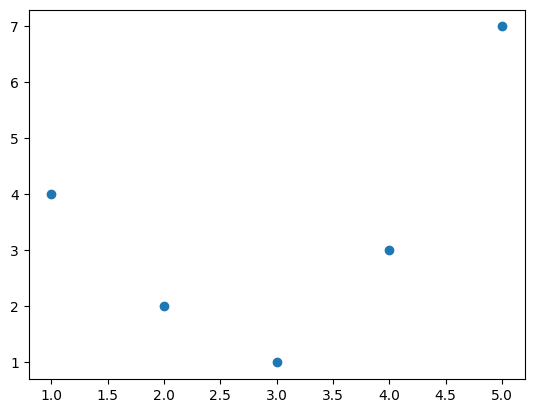

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

- Applying a poor model that clearly do not ddescribe the data:

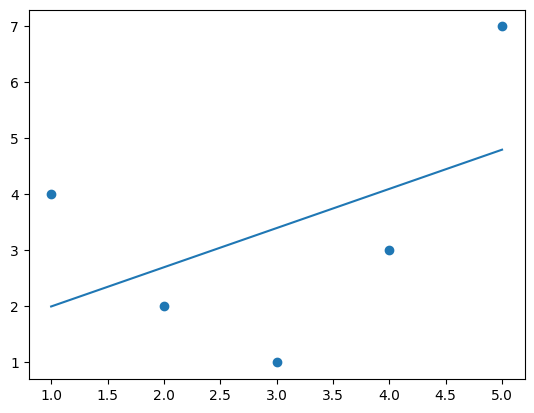

In [22]:
from sklearn.linear_model import LinearRegression

X = x[:, np.newaxis]

model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

It’s clear that we need a more sophisticated model to describe the relationship
between x and y. We can do this by transforming the data, adding extra columns of features to drive more flexibility in the model. For example, we can add polynomial features to the data this way:

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
X2, X

(array([[  1.,   1.,   1.],
        [  2.,   4.,   8.],
        [  3.,   9.,  27.],
        [  4.,  16.,  64.],
        [  5.,  25., 125.]]),
 array([[1],
        [2],
        [3],
        [4],
        [5]]))

The derived feature matrix has one column representing $x$, and a second column representing $x^2$, and a third column representing $x^3$. Computing a linear regression on this expanded input gives a much closer fit to our data

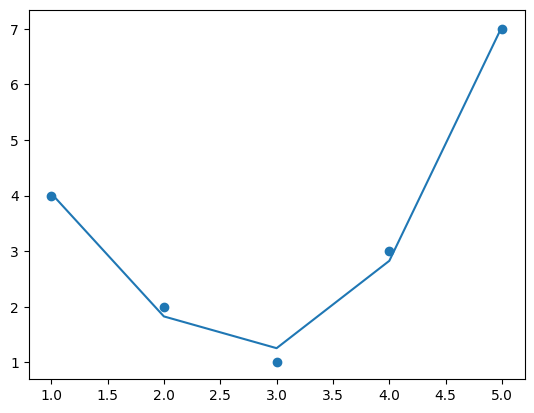

In [26]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

This idea of improving a model not by changing the model, but by transforming the inputs, is fundamental to many of the more powerful machine learning methods.

# Imputation of Missing Data

In [28]:
from numpy import nan

X = np.array([[ nan, 0, 3 ],
              [ 3, 7, 9 ],
              [ 3, 5, 2 ],
              [ 4, nan, 6 ],
              [ 8, 8, 1 ]])
y = np.array([14, 16, -1, 8, -5])

X, y

(array([[nan,  0.,  3.],
        [ 3.,  7.,  9.],
        [ 3.,  5.,  2.],
        [ 4., nan,  6.],
        [ 8.,  8.,  1.]]),
 array([14, 16, -1,  8, -5]))

## Imputer Class

In [32]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [33]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

# Feature Pipelines

## Example:

  - We want a processing pipeline that do:

    -1. Impute missing values using the mean

    -2. Transform features to quadratic
    
    -3. Fit a linear regression

In [35]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

model.fit(X, y) # X with missing values, from above
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]
